<a href="https://colab.research.google.com/github/catnipglitch/google-colab-notebooks-catnip/blob/main/openai/OpenAI_ImageGen_Example02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# このノートブックでは、OpenAIのGPT-Image-1モデルを使って、テキストからイラストを生成できます。




このノートブックでは、OpenAIのGPT-Image-1モデルを使って、日本語で記述したプロンプトからイラストを生成できます。
生成された画像は、Google Driveに保存されます。

## 準備:

### OpenAI APIキーの設定:
まず、OpenAIのウェブサイトでAPIキーを取得してください。
取得したAPIキーを、Google Colabのユーザーデータに `OPENAI_API_KEY` という名前で保存します。

### Google Driveのマウント:
ノートブックを実行すると、Google Driveが自動的にマウントされます。
生成された画像は、`AI_Generated_Images` というフォルダに保存されます。
フォルダが存在しない場合は、自動的に作成されます。

## プロンプトのカスタマイズ:

### プロンプト:
ノートブック内の `prompt` 変数に、生成したいイラストの詳細な説明を日本語で記述してください。
プロンプトを具体的に記述することで、よりイメージに近いイラストが生成されます。
例えば、キャラクターの服装、髪型、表情、背景などを細かく指定できます。

### 画像設定の変更:
`img_size`, `img_quality`, `img_background` 変数で、画像のサイズ、品質、背景を変更できます。
必要に応じて、これらの変数の値を調整してください。

## 実行:

上記の設定が完了したら、ノートブックのセルを順番に実行してください。
しばらくすると、生成されたイラストが表示されます。
画像と生成に使用したプロンプト、パラメータは、Google Driveの`AI_Generated_Images`フォルダに保存されます。

## 注意事項:

* OpenAI APIの利用には料金が発生します。
* プロンプトの内容によっては、意図したイラストが生成されない場合があります。
* より詳細な設定や使い方については、OpenAIのドキュメントを参照してください。

In [1]:
!pip install openai

## Setup

In [2]:
# @title ライブラリ初期化とGoogle Drive マウント {"run":"auto"}
import os
import base64
import json
import datetime
from pathlib import Path
from openai import OpenAI
from google.colab import userdata, drive
from IPython.display import Image, display

# Googleドライブを一度だけマウントするのだ！
drive.mount('/content/drive')

# 保存先のディレクトリを設定するのだ
ROOT_DIR = '/content/drive/MyDrive/AI_Generated_Images'  # @param {"type":"string"}
os.makedirs(ROOT_DIR, exist_ok=True)

# API接続の準備をするのだ
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))


Mounted at /content/drive


## 汎用関数群

In [3]:
# @title ユニークなファイル名を生成

def generate_unique_filename(total_count=1, current_index=1) -> str:
    """重複しないタイムスタンプベースのファイル名を生成するのだ"""
    timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M-%S')
    base_filename = timestamp

    # n が 1 以外の場合は連番を追加
    if total_count > 1:
        filename = f"{base_filename}_{current_index:02d}of{total_count:02d}"
    else:
        filename = base_filename

    img_path = os.path.join(SAVE_DIR, f"{filename}.png")
    json_path = os.path.join(SAVE_DIR, f"{filename}.json")

#　同名のファイルチェック
    index = 0
    while os.path.exists(img_path) or os.path.exists(json_path):
        index += 1
        filename = f"{base_filename}_{current_index:02d}of{total_count:02d}_{index}"
        img_path = os.path.join(SAVE_DIR, f"{filename}.png")
        json_path = os.path.join(SAVE_DIR, f"{filename}.json")

    return filename

In [10]:
# @title 画像生成プロンプト {"run":"auto","vertical-output":true}

custom_dir_name = "infographics" # @param {"type":"string"}
prompt = "Create a vibrant infographic that explains photosynthesis as if it were a recipe for a plant's favorite food. Show the \\\"ingredients\\\" (sunlight, water, CO2) and the \"finished dish\" (sugar/energy). The style should be like a page from a colorful kids' cookbook, suitable for a 4th grader." # @param {type:"string"}
img_size = '1536x1024' # @param ["1024x1024", "1536x1024", "1024x1536"]
img_quality = 'high' # @param ["high", "medium","low"]
img_background_jp = '不透明' # @param ["不透明", "透明"]
#img_background = 'opaque' # @param ["transparent", "opaque"]

img_count = 1 # @param {"type":"slider","min":1,"max":4,"step":1}

model_name = "gpt-image-1.5"  # @param ["gpt-image-1", "gpt-image-1.5"]

# 日本語の選択肢と英語のキーワードを対応付ける辞書
image_background_options_dic = {
    "透明": "transparent",
    "不透明": "opaque"
}
# 辞書を使って英語のキーワードに変換
img_background_en = image_background_options_dic.get(img_background_jp, "opaque")



# 保存先のディレクトリを再設定するのだ
SAVE_DIR = ROOT_DIR+"/"+custom_dir_name
os.makedirs(SAVE_DIR, exist_ok=True)

print(f"output folder : { SAVE_DIR}")




output folder : /content/drive/MyDrive/AI_Generated_Images/infographics


画像 1 が生成されたのだ！表示するのだ～！


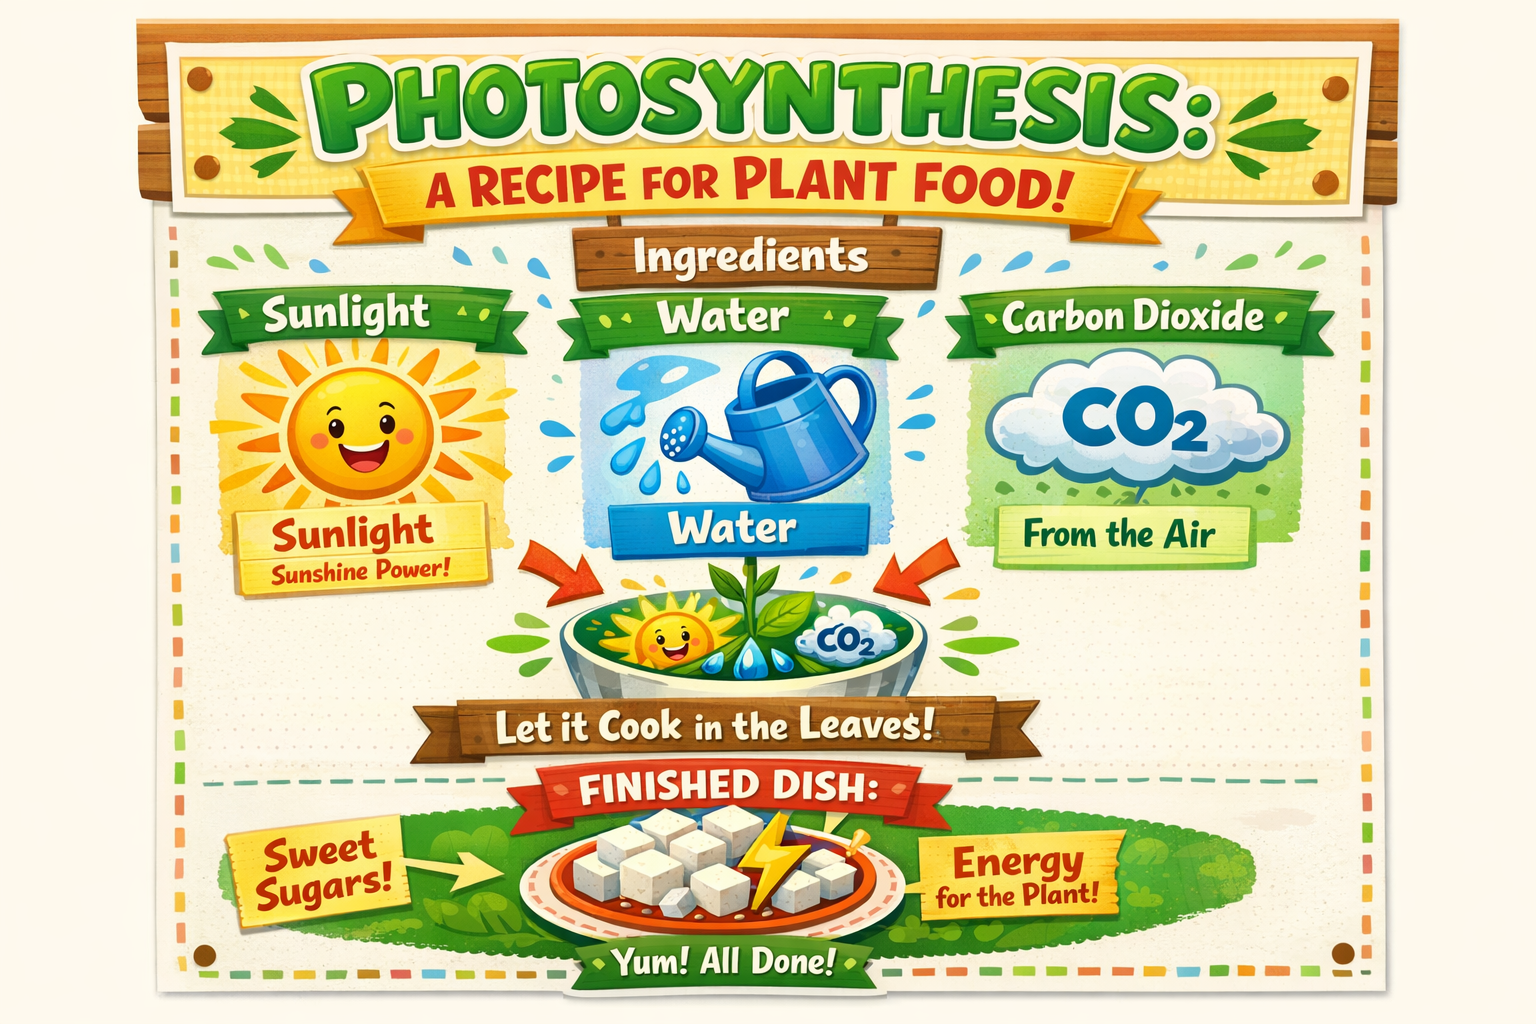

画像を保存したのだ: /content/drive/MyDrive/AI_Generated_Images/infographics/2025-1221-0020-47.png
パラメータも保存したのだ: /content/drive/MyDrive/AI_Generated_Images/infographics/2025-1221-0020-47.json


In [11]:
# @title 画像の生成



try:
    # GPT-Image-1で画像生成を試すのだ！
    response = client.images.generate(
        model=model_name,
        prompt=prompt,
        n=img_count,
        size=img_size,
        background=img_background_en,
        quality=img_quality
    )

    # レスポンスを確認して画像を表示するのだ！
    for i, image_data in enumerate(response.data):
      image_bytes = base64.b64decode(image_data.b64_json)

      # 画像を表示
      print(f"画像 {i + 1} が生成されたのだ！表示するのだ～！")
      display(Image(data=image_bytes, width=400))

      # ユニークなファイル名を生成するのだ
      filename = generate_unique_filename(total_count=img_count, current_index=i + 1)

      img_file_path = os.path.join(SAVE_DIR, f"{filename}.png")
      json_file_path = os.path.join(SAVE_DIR, f"{filename}.json")

      # 画像ファイルを保存するのだ
      with open(img_file_path, 'wb') as img_file:
          img_file.write(image_bytes)

      # 生成パラメータをJSONファイルに保存するのだ
      params = {
          "prompt": prompt,
          "size": img_size,
          "quality": img_quality,
          "background": img_background_en,
          "model": "gpt-image-1",
          "generation_time": datetime.datetime.now().isoformat(),
      }

      with open(json_file_path, 'w', encoding='utf-8') as json_file:
          json.dump(params, json_file, ensure_ascii=False, indent=2)

      print(f"画像を保存したのだ: {img_file_path}")
      print(f"パラメータも保存したのだ: {json_file_path}")

except Exception as e:
    print(f"画像生成でエラーが起きてしまったのだ: {e}")